## Exploratory Data Analysis
 - In this notebook I intend to show visualizations and key insights I derived from the credit card dataset given to us.

### Importing neccessary libraries and scripts

In [57]:
import pandas as pd 
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath('../scripts'))

from utils import *

### Loading the dataset
 - 3 Datasets were given:
    1. ***Credit Card*** - Contains bank transaction data specifically curated for fraud detection analysis. 
    2. ***Fraud data*** - Includes e-commerce transaction data aimed at identifying fraudulent activities.
    3. ***Ip adress to country*** - Maps IP addresses to countries

In [2]:
credit_df= pd.read_csv('../data/creditcard.csv')
fraud_df= pd.read_csv('../data/Fraud_Data.csv')
ip_df= pd.read_csv('../data/IpAddress_to_Country.csv')

In [7]:
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [6]:
ip_df

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


#### Distribution of key aspects in the credit card dataset

In [19]:
credit_df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,283726.000000,283726.000000,283726.000000
mean,94811.077600,88.472687,0.001667
std,47481.047891,250.399437,0.040796
min,0.000000,0.000000,0.000000
25%,54204.750000,5.600000,0.000000
50%,84692.500000,22.000000,0.000000
75%,139298.000000,77.510000,0.000000
max,172792.000000,25691.160000,1.000000


- For the `Amount` column, We can see by the distribution of the quartiles that almost all the entries are concentrated at the lower end of the column. 75% of the data is less than 80 and the maximum value is 25,961. This indicates a right-skewed distribution of values. 
- As expected, `Class` column has more 0s than 1s. This shows that most of the entries are non-fraudulent. 
- The `Time` column has a pretty standard distribtion with the mean sitting close to the middle of the dataset

#### Checking for null values

In [3]:
credit_df.isnull().sum().sum()

np.int64(0)

In [22]:
fraud_df.isnull().sum().sum()

np.int64(0)

In [23]:
ip_df.isnull().sum().sum()

np.int64(0)

- All 3 datasets have no null values

In [4]:
credit_df[credit_df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [3]:
credit_df.drop_duplicates(inplace=True)

- `credit_df` dataset had some duplicates and so they need to be dropped for further analysis. The other two datasets have no duplicates. 

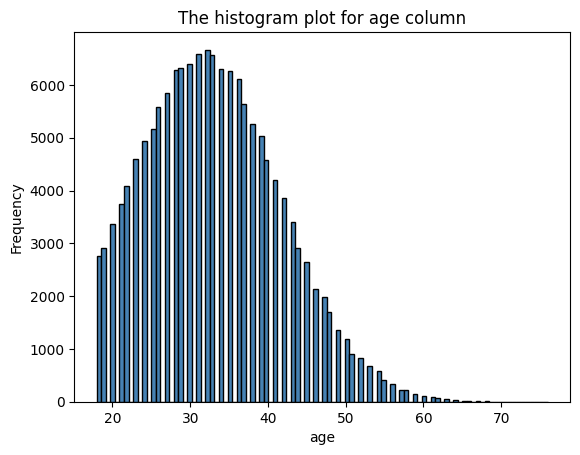

In [8]:
plot_data(fraud_df,'age')

- The `age` column for the fraud dataset depicts a normal distribution pattern where most of the values are concentrated in the middle.

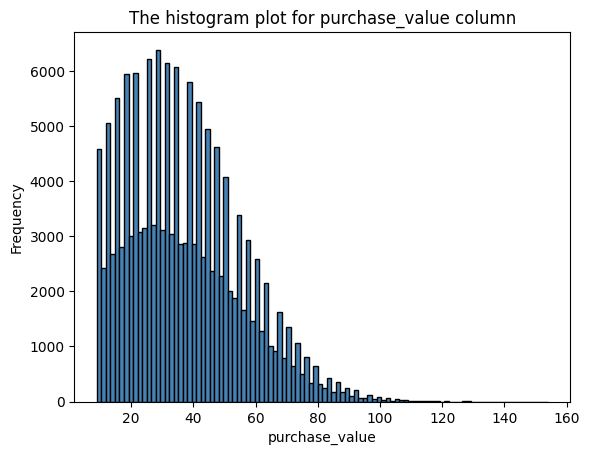

In [9]:
plot_data(fraud_df,'purchase_value')

- The graph exhibits a normal distribution, characterized by its bell-shaped curve, indicating that most data points cluster around the mean. However, there is a noticeable oscillating pattern throughout the data, with fluctuations that rise and fall consistently. This up-and-down trend suggests underlying variations or cycles within the dataset that may warrant further investigation.

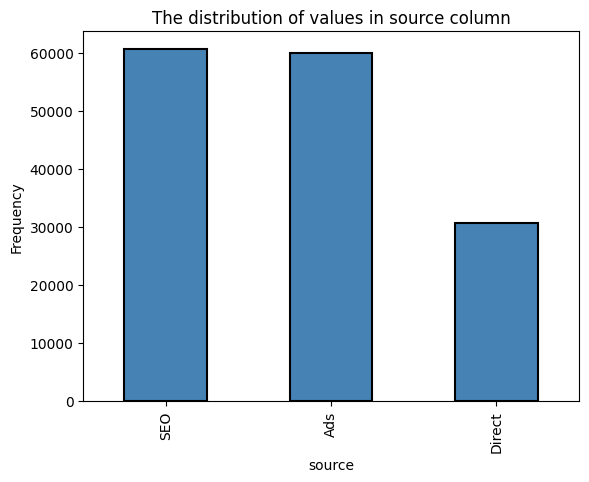

In [20]:
plot_data(fraud_df,'source')

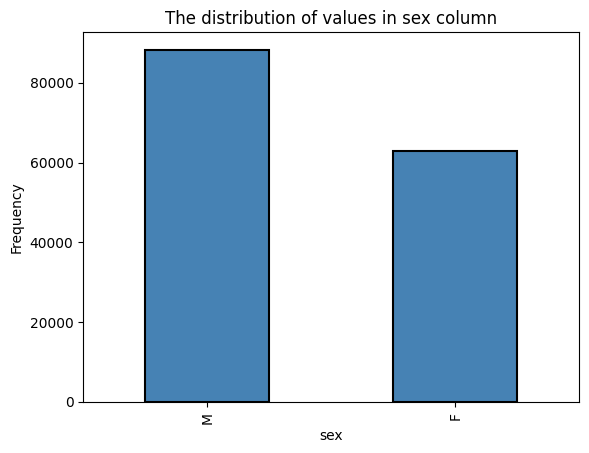

In [6]:
plot_data(fraud_df,'sex')

- **SEO(Search Engine Optimization)** brings in the most customers. This customer acquisition method is slightly greater than **Ads**. 

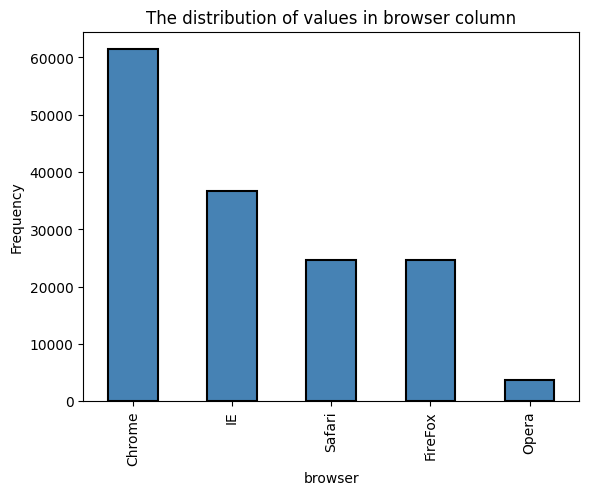

In [7]:
plot_data(fraud_df,'browser')

- ***Chrome*** is the most used browser by users when trying to purchase an item.
- ***Opera*** has the lowest count out of all the browsers

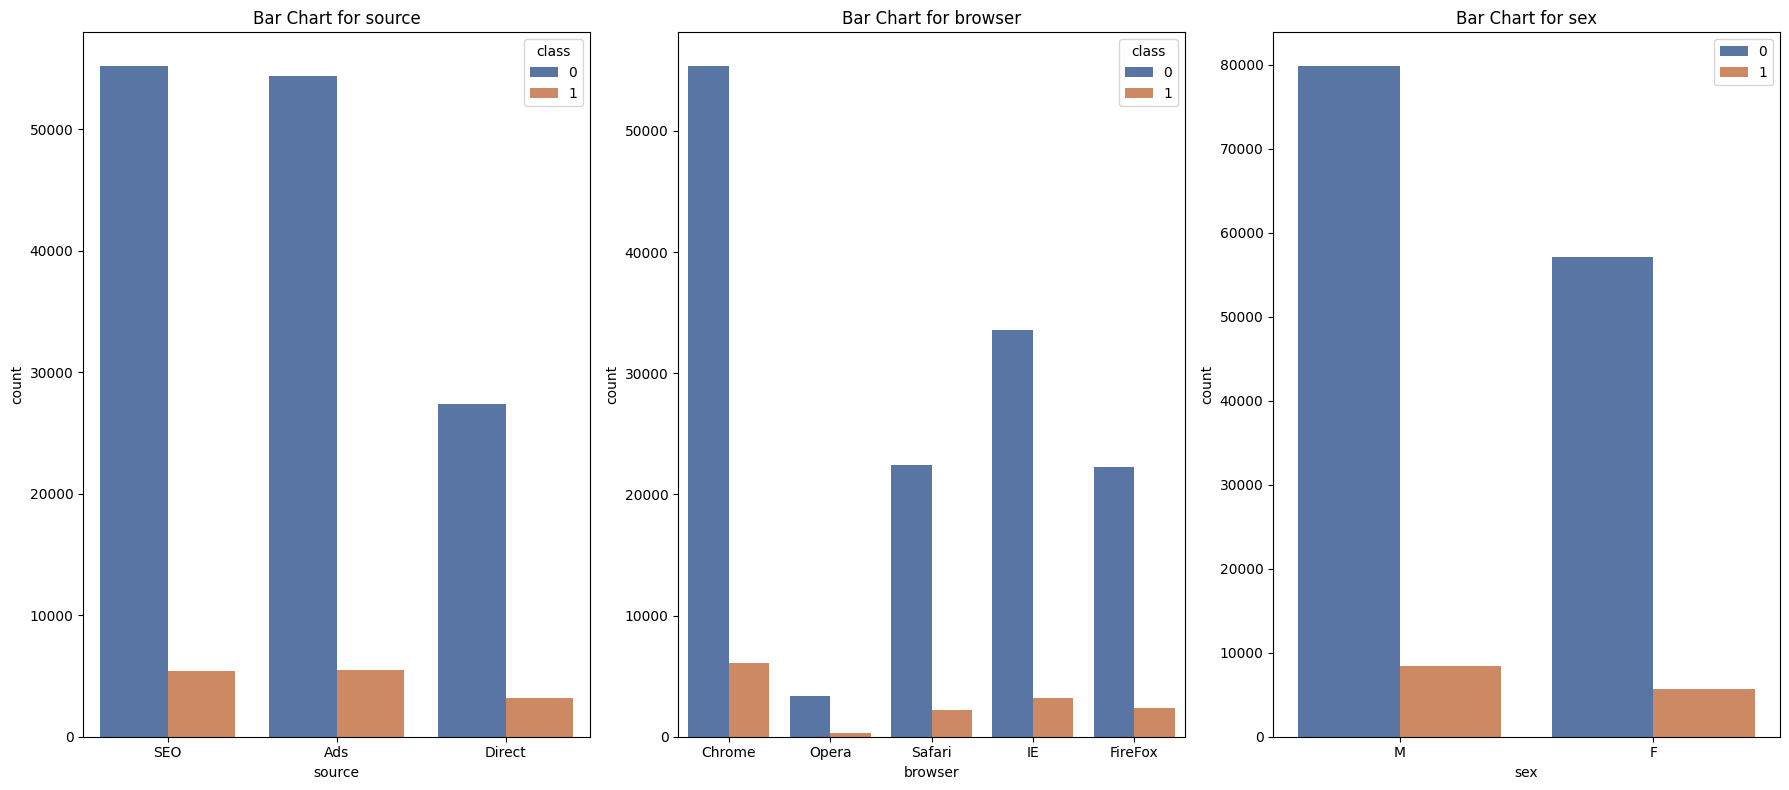

In [3]:
cols=['source','browser','sex']
bivariant_plot(data=fraud_df,columns=cols)

- Almost all unique values of the columns have proportional class values. The more count the entry has, the bigger the class count.

### Geolocational Analysis

In [4]:
fraud_df['country']=fraud_df['ip_address'].apply(lambda x: country(x,ip_df))
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States


- I created a function to bring the country column from the ip_address dataset.
    - What I did was if the ip_address in the fraud dataset is in between the lower_bound_ip_address and upper_bound_ip_address values, I made the function to return the country in that range. The function can be found in the utils module and its application can be seen above.

In [5]:
#There are few null values so handle to decrease confusion and ambiguity, let's fill the null values with "Other"
fraud_df['country'].fillna('Other',inplace=True)

- To show the geographical analysis, I downloaded a world dataset from the link https://www.naturalearthdata.com/downloads/110m-cultural-vectors/. The dataset can be seen below.

In [6]:
world=gpd.read_file('../data/ne_110m_admin_0_countries.shp')
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


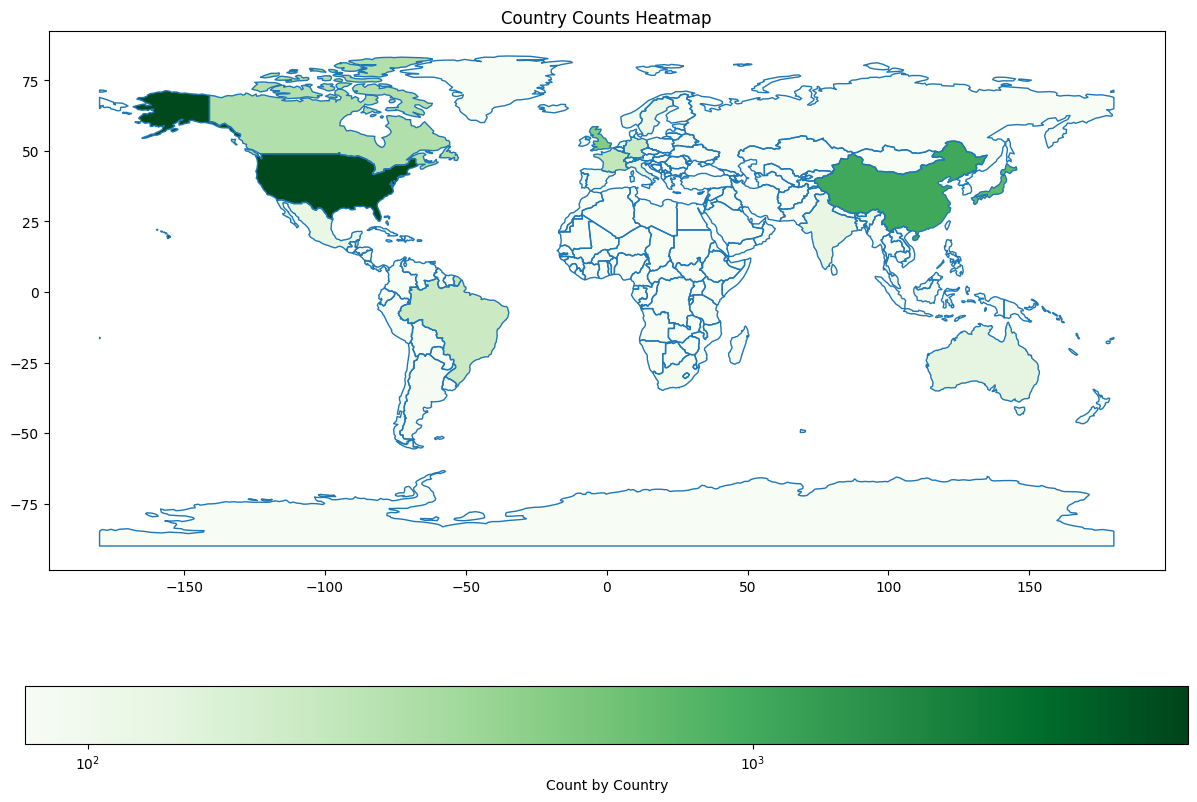

In [7]:
geographical_plot(fraud_df,world)

1. ***United States of America*** is home to most of the fraudulent activity we found on our dataset. **China** and **Japan** are the next countries with the most fraudulent activity. **United Kingdom**, **Canada** and **Brazil** also have some notable activities

#### Transaction Frequency and Velocity

In [8]:
fraud_df_new=feature_engineering(fraud_df)
fraud_df_new

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,total_purchase_value,transaction_velocity,dayofweek,month,day,hour
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,34,34.0,5,4,18,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States of America,1,16,16.0,0,6,8,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States of America,12,180,15.0,3,1,1,18
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Other,1,44,44.0,0,5,4,13
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States of America,1,39,39.0,2,9,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States of America,2,75,37.5,6,3,29,0
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,1,35,35.0,1,5,26,12
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,1,40,40.0,2,5,20,7
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States of America,2,96,48.0,0,9,7,9


### Scaling and Encoding
- On the following cells, I scaled numerical values using the `StandardScaler` class. I also encoded categorical columns using `LabelEncoder` and `OneHotEncoder`. I used pandas pd.get_dummies function as a one-hot encoder tool. 
- I chose to use both LabelEncoder and OneHotEncoder. The reason is that both have advantages and disadvantages.
    1. For LabelEncoder, the advantage is that it is not computationally expensive and it gives a logical order to the unique values it finds. The disadvantage, on the other hand, is that the order it gives can be misleading for some tree-based models like decision tree and random forest. For example, if the LabelEncoder assigns value 0 to Male and 1 to Female, these tree-based models can interpret this to "Female is greater than Male" since 1 is greater than 0.
    2. For OneHotEncoder, the advantage is that there is no misleading since it gives binary values to all unique values. This approach is also more accurate. The disadvantage, however, is that it is computationally expensive and a big time-sink since it creates a column for each unique value in a categorical column.    

In [14]:
fraud_df_model=fraud_df_new.drop(['user_id','signup_time','purchase_time','device_id','ip_address'],axis=1)
fraud_df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   purchase_value         151112 non-null  int64  
 1   source                 151112 non-null  object 
 2   browser                151112 non-null  object 
 3   sex                    151112 non-null  object 
 4   age                    151112 non-null  int64  
 5   class                  151112 non-null  int64  
 6   country                151112 non-null  object 
 7   transaction_frequency  151112 non-null  int64  
 8   total_purchase_value   151112 non-null  int64  
 9   transaction_velocity   151112 non-null  float64
 10  dayofweek              151112 non-null  int32  
 11  month                  151112 non-null  int32  
 12  day                    151112 non-null  int32  
 13  hour                   151112 non-null  int32  
dtypes: float64(1), int32(4), int64(5), o

- Importing the classes

In [60]:
encoder=LabelEncoder()
scaler=StandardScaler()

- Encoding and Standardization using **LabelEncoder** for the **Fraud dataset**

In [58]:
cat_cols=['sex','browser','source','country']
numerical_cols=list(fraud_df_model.select_dtypes(include=[np.int64,np.int32,np.float64]))
numerical_cols.remove('class')
fraud_df_label=fraud_df_new.drop(['user_id','signup_time','purchase_time','device_id','ip_address'],axis=1)
for i in cat_cols:
    fraud_df_label[i]=encoder.fit_transform(fraud_df_label[i])
fraud_df_label[numerical_cols]=scaler.fit_transform(fraud_df_label[numerical_cols])
fraud_df_label

,purchase_value,source,browser,sex,age,class,country,transaction_frequency,total_purchase_value,transaction_velocity,dayofweek,month,day,hour
0,-0.160204,2,0,1,0.679914,0,84,-0.261514,-0.249985,-0.163219,0.991020,-0.754946,0.308768,-1.377455
1,-1.142592,0,0,0,2.304476,0,172,-0.261514,-0.408448,-1.164096,-1.501259,-0.003243,-0.825780,-1.522122
2,-1.197169,2,3,1,2.304476,1,172,3.941861,1.035319,-1.219700,-0.005891,-1.882499,-1.619963,0.937208
3,0.385567,2,4,1,0.911994,0,126,-0.261514,-0.161951,0.392823,-1.501259,-0.379095,-1.279599,0.213876
4,0.112681,0,4,1,1.376155,0,172,-0.261514,-0.205968,0.114802,-0.504347,1.124310,-0.712325,0.937208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0.330990,2,0,1,-0.596528,1,172,0.120611,0.110956,0.031396,1.489476,-1.130797,1.556770,-1.666788
151108,-0.105627,2,4,1,-0.132367,0,118,-0.261514,-0.241182,-0.107615,-1.002803,-0.379095,1.216406,0.069209
151109,0.167258,2,2,0,-0.828608,0,84,-0.261514,-0.197165,0.170406,-0.504347,-0.379095,0.535677,-0.654123
151110,0.494721,2,0,1,0.447833,0,172,0.120611,0.295829,0.615240,-1.501259,1.124310,-0.939235,-0.364790


- Encoding and Standardization using **OneHotEncoder** for the **Fraud dataset**

In [36]:
fraud_df_model[numerical_cols]=scaler.fit_transform(fraud_df_model[numerical_cols])
fraud_df_model

,purchase_value,source,browser,sex,age,class,country,transaction_frequency,total_purchase_value,transaction_velocity,dayofweek,month,day,hour
0,-0.160204,SEO,Chrome,M,0.679914,0,Japan,-0.261514,-0.249985,-0.163219,0.991020,-0.754946,0.308768,-1.377455
1,-1.142592,Ads,Chrome,F,2.304476,0,United States of America,-0.261514,-0.408448,-1.164096,-1.501259,-0.003243,-0.825780,-1.522122
2,-1.197169,SEO,Opera,M,2.304476,1,United States of America,3.941861,1.035319,-1.219700,-0.005891,-1.882499,-1.619963,0.937208
3,0.385567,SEO,Safari,M,0.911994,0,Other,-0.261514,-0.161951,0.392823,-1.501259,-0.379095,-1.279599,0.213876
4,0.112681,Ads,Safari,M,1.376155,0,United States of America,-0.261514,-0.205968,0.114802,-0.504347,1.124310,-0.712325,0.937208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0.330990,SEO,Chrome,M,-0.596528,1,United States of America,0.120611,0.110956,0.031396,1.489476,-1.130797,1.556770,-1.666788
151108,-0.105627,SEO,Safari,M,-0.132367,0,Netherlands,-0.261514,-0.241182,-0.107615,-1.002803,-0.379095,1.216406,0.069209
151109,0.167258,SEO,IE,F,-0.828608,0,Japan,-0.261514,-0.197165,0.170406,-0.504347,-0.379095,0.535677,-0.654123
151110,0.494721,SEO,Chrome,M,0.447833,0,United States of America,0.120611,0.295829,0.615240,-1.501259,1.124310,-0.939235,-0.364790


In [40]:
fraud_df_model=pd.get_dummies(fraud_df_model,columns=['sex','browser','source','country'])
fraud_df_model


,purchase_value,age,class,transaction_frequency,total_purchase_value,transaction_velocity,dayofweek,month,day,hour,...,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,-0.160204,0.679914,0,-0.261514,-0.249985,-0.163219,0.991020,-0.754946,0.308768,-1.377455,...,False,False,False,False,False,False,False,False,False,False
1,-1.142592,2.304476,0,-0.261514,-0.408448,-1.164096,-1.501259,-0.003243,-0.825780,-1.522122,...,True,False,False,False,False,False,False,False,False,False
2,-1.197169,2.304476,1,3.941861,1.035319,-1.219700,-0.005891,-1.882499,-1.619963,0.937208,...,True,False,False,False,False,False,False,False,False,False
3,0.385567,0.911994,0,-0.261514,-0.161951,0.392823,-1.501259,-0.379095,-1.279599,0.213876,...,False,False,False,False,False,False,False,False,False,False
4,0.112681,1.376155,0,-0.261514,-0.205968,0.114802,-0.504347,1.124310,-0.712325,0.937208,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0.330990,-0.596528,1,0.120611,0.110956,0.031396,1.489476,-1.130797,1.556770,-1.666788,...,True,False,False,False,False,False,False,False,False,False
151108,-0.105627,-0.132367,0,-0.261514,-0.241182,-0.107615,-1.002803,-0.379095,1.216406,0.069209,...,False,False,False,False,False,False,False,False,False,False
151109,0.167258,-0.828608,0,-0.261514,-0.197165,0.170406,-0.504347,-0.379095,0.535677,-0.654123,...,False,False,False,False,False,False,False,False,False,False
151110,0.494721,0.447833,0,0.120611,0.295829,0.615240,-1.501259,1.124310,-0.939235,-0.364790,...,True,False,False,False,False,False,False,False,False,False


- Standardization for the **Credit Card dataset** (Encoding is not needed since there is no categorical columns for this dataset)

In [48]:
credit_df[['Time','Amount']]=scaler.fit_transform(credit_df[['Time','Amount']])
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,1.642257,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,1.642278,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,1.642278,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


- Saving the .csv files to our own local directory 

In [59]:
credit_df.to_csv('../data/credit_transformed.csv')
fraud_df_model.to_csv('../data/fraud_transformed.csv')
fraud_df_label.to_csv('../data/fraud_transformed_label.csv')